<a href="https://colab.research.google.com/github/FredyVG15/Entregas-/blob/main/Colocaci%C3%B3n_M%C3%A9todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Colocación para EDO**

## 5.1 Considere el problema de valor inicial

Sea la ecuación diferencial
$$
\
u'' + u = x,
\
$$
con condiciones iniciales
$$
\
u(0) = 0, \qquad u'(0) = 2.
\
$$
Buscamos una solución aproximada de la forma:

$$\
u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots
\$$

---

### (i) Elija $$\alpha_0\  y\ \alpha_1\ $$ para satisfacer las condiciones dadas.

---

### (ii) Defina

$$
\varepsilon = u_N'' + u_N - x,
$$

y encuentre $$(\varepsilon)$$ en este caso.

---

Restringiendo $$(u_N)$$ a ser cúbico, utilice $$(x = \tfrac12)$$ y $$(x = 1)$$ como puntos de colocación para encontrar una solución aproximada.

In [14]:
import sympy as sp #Álgebra simbólica: derivadas, integrales, ecuaciones, expresiones exactas
import numpy as np # Cálculo numérico
import matplotlib.pyplot as plt # Gráficas: visualización de datos

In [15]:
x = sp.symbols('x') #crea una variable simbólica para las derivadas
u = sp.Function('u') # declara una función simbólica para las ecuaciones diferenciales

In [16]:
# Definimos la ecuación diferencial
ode = sp.Eq(u(x).diff(x, 2) + u(x), x) #crea en SymPy la ecuación diferencial

In [17]:
# Resolvemos considerando las condiciones iniciales u(0)=0, u'(0)=2
sol_exact = sp.dsolve(ode, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})
u_exact_expr = sol_exact.rhs
print("Solución exacta u(x):") #Resuelve la ecuación diferencial considerando las condiciones iniciales
sp.pprint(u_exact_expr)  # debe salir x + sin(x)

Solución exacta u(x):
x + sin(x)


In [5]:
# Versión numérica para graficar
u_exact_num = sp.lambdify(x, u_exact_expr, "numpy")


In [18]:

# Para la aproximación polinómica u_N (cúbica)
#     u_N = a0 + a1 x + a2 x^2 + a3 x^3

a0, a1, a2, a3 = sp.symbols('a0 a1 a2 a3')

uN = a0 + a1*x + a2*x**2 + a3*x**3 # este código está construyendo simbólicamente Un(x)(es un polinomio cúbico) pra obtener la solución exacta u(x)

In [19]:
# Condiciones iniciales:

uN0   = uN.subs(x, 0)
uN_p  = sp.diff(uN, x)
uN_p0 = uN_p.subs(x, 0)

sol_ic = sp.solve(
    (sp.Eq(uN0, 0),        # u_N(0)=0
     sp.Eq(uN_p0, 2)),     # u_N'(0)=2
    (a0, a1)
)

print("Coeficientes por condiciones iniciales:")
print(sol_ic)  # as condiciones iniciales determinan los coeficientes del polinomio cúbico asociados a los términos


Coeficientes por condiciones iniciales:
{a0: 0, a1: 2}


In [20]:
# Aquí se sutituye a0 y a1 en u_N
uN = uN.subs(sol_ic)
print("Aproximación con a2 y a3 libres:")
sp.pprint(uN)
#la aproximación cúbica se reduce ahora a:


Aproximación con a2 y a3 libres:
    2       3      
a₂⋅x  + a₃⋅x  + 2⋅x


In [21]:

### Se define el residuo ε(x) = u_N'' + u_N - x

uN_pp = sp.diff(uN, x, 2)
eps = sp.simplify(uN_pp + uN - x)

print("Residuo ε(x) = u_N'' + u_N - x:")
sp.pprint(eps)


Residuo ε(x) = u_N'' + u_N - x:
    2              3             
a₂⋅x  + 2⋅a₂ + a₃⋅x  + 6⋅a₃⋅x + x


In [22]:

# Se aplica método de Colocación en x = 1/2 y x = 1
#    ε(1/2) = 0, ε(1) = 0  -> sistema para a2, a3

points = [sp.Rational(1, 2), 1]
eqs = [sp.Eq(eps.subs(x, p), 0) for p in points]

print("Sistema de ecuaciones para a2 y a3:")
for eq in eqs:
    sp.pprint(eq)

sol_a2_a3 = sp.solve(eqs, (a2, a3))
print("Solución del sistema (a2, a3):")
print(sol_a2_a3)

##El residuo mide qué tanto se está equivocando tu aproximación polinómica

Sistema de ecuaciones para a2 y a3:
9⋅a₂   25⋅a₃   1    
──── + ───── + ─ = 0
 4       8     2    
3⋅a₂ + 7⋅a₃ + 1 = 0
Solución del sistema (a2, a3):
{a2: -1/17, a3: -2/17}


In [23]:
# Se sistutuye  a2, a3 en u_N
uN_final = sp.simplify(uN.subs(sol_a2_a3))

print("Solución aproximada u_N(x):")
sp.pprint(uN_final)

Solución aproximada u_N(x):
  ⎛     2         ⎞
x⋅⎝- 2⋅x  - x + 34⎠
───────────────────
        17         


In [24]:
# Se visualizan los coeficientes
a2_val = sol_a2_a3[a2]
a3_val = sol_a2_a3[a3]
print("Coeficientes finales:")
print("a0 = 0")
print("a1 = 2")
print("a2 =", a2_val)
print("a3 =", a3_val)


Coeficientes finales:
a0 = 0
a1 = 2
a2 = -1/17
a3 = -2/17


In [25]:

# Error simbólico u(x) - u_N(x)

error_expr = sp.simplify(u_exact_expr - uN_final)
print("Error simbólico e(x) = u(x) - u_N(x):")
sp.pprint(error_expr)

Error simbólico e(x) = u(x) - u_N(x):
   3    2             
2⋅x    x              
──── + ── - x + sin(x)
 17    17             


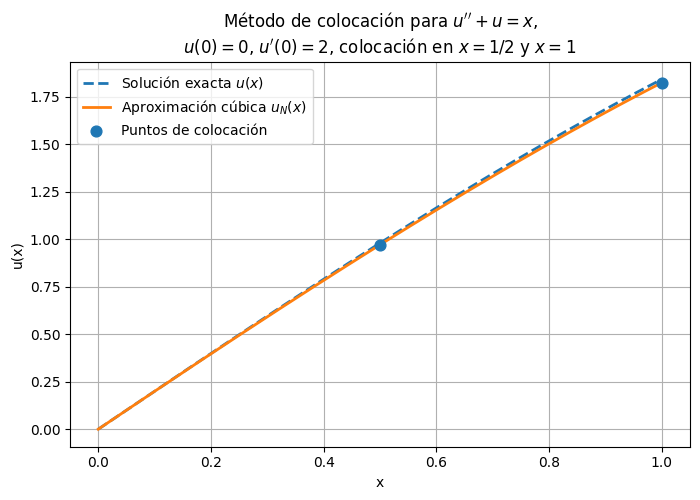

In [26]:

# Graficar solución exacta vs aproximada

xx = np.linspace(0, 1, 200)
uN_num = sp.lambdify(x, uN_final, "numpy")

plt.figure(figsize=(8,5))
plt.plot(xx, u_exact_num(xx), "--", label="Solución exacta $u(x)$", linewidth=2)
plt.plot(xx, uN_num(xx), label="Aproximación cúbica $u_N(x)$", linewidth=2)

# Puntos de colocación marcados
pcs = np.array([0.5, 1.0])
plt.scatter(pcs, uN_num(pcs), s=60, label="Puntos de colocación", zorder=5)

plt.title("Método de colocación para $u''+u=x$,\n"
          "$u(0)=0$, $u'(0)=2$, colocación en $x=1/2$ y $x=1$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()